In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def get_col(fn, col_name):
    df = pd.read_csv(fn)
    return df[col_name].values

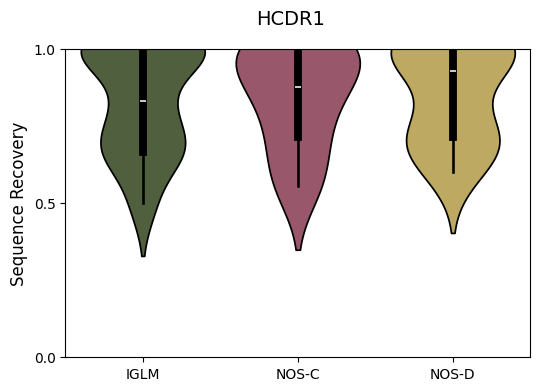

In [28]:
iglm_fn = 'data/iglm_fixed_samples_labeled_hcdr1.csv'
iglm_data = get_col(iglm_fn, 'seq_recovery')
iglm_med = np.median(iglm_data)

nosc_fn = 'data/gaussian_fixed_length=True_samples_labeled_hcdr1.csv'
nosc_data = get_col(nosc_fn, 'seq_recovery')
nosc_med = np.median(nosc_data)

nosd_fn = 'data/mlm_fixed_length=True_samples_labeled_hcdr1.csv'
nosd_data = get_col(nosd_fn, 'seq_recovery')
nosd_med = np.median(nosd_data)

data_violin = {
    'IGLM': iglm_data,
    'NOS-C': nosc_data,
    'NOS-D': nosd_data
}

data_bar = {
    'Algorithm': ['IGLM', 'NOS-C', 'NOS-D'],
    'Median Sequence Recovery': [iglm_med, nosc_med, nosd_med]
}

fig, axes = plt.subplots(1, 1, figsize=(6, 4))

group_names = []
values = []
for group, samples in data_violin.items():
    group_names.extend([group] * len(samples))
    values.extend(samples)

df_v = pd.DataFrame({"Algorithm": group_names, "Sequence Recovery": values})
sns.violinplot(x='Algorithm', y='Sequence Recovery', data=df_v, inner='box', palette=['#506538', '#A44C68', '#CCB252'], hue='Algorithm', linecolor='black', ax=axes)
axes.set_ylim(top=1)
axes.set_xlabel('')
axes.set_ylabel('Sequence Recovery', fontsize=12)
axes.tick_params(axis='both', which='major', labelsize=10)
axes.set_yticks(np.linspace(0, 1, 3))

fig.suptitle('HCDR1', fontsize=14)

plt.show()


In [20]:
nos_d_guid_fn = "data/mlm_fixed_length=True_autoregressive_sample=False_step_size=0.1_stability_coef=10.0_num_steps=10_guidance_layer=first_return_best=True_samples_labeled_hcdr1.csv"
nosd_beta_sheet = get_col(nos_d_guid_fn, 'ss_perc_sheet')